In [1]:
from quantum.Quantum import QuantumRegressor
import pennylane as qml
import pandas as pd
from pennylane import numpy as np
import time
import joblib
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### First we have to select and trim our dataset

In [2]:
page_st = time.time()
df = joblib.load("/home/taylo773/Quantum/GitHub/qregress/database/processed/BSE49_existing.bin")
scaler = MinMaxScaler()

y = df['BSE']
y = np.array(y)
X = df.drop(['BSE'], axis=1)
X = np.array(X)
print(X.shape)
new_X = np.empty((100, 2))
for i in range(len(new_X)):
    new_X[i] = X[i][4:6]
X = scaler.fit_transform(new_X)

y = y.reshape(-1, 1)
target_scaler = MinMaxScaler()
target_scaler.fit(y)
y = target_scaler.transform(y)
y = y[:100]

(1951, 151)


In [3]:
num_qubits = 2
max_iterations = 100
device = 'default.qubit'

encoder = qml.AngleEmbedding
variational_circuit = qml.StronglyEntanglingLayers

model = QuantumRegressor(encoder, variational_circuit, num_qubits, max_iterations=max_iterations)

initial_parameters = [
    [[0,0,0],
     [0,0,0]]
]
initial_parameters = np.random.rand(1, 2, 3)
initial_parameters = np.array(initial_parameters) + np.pi / 4
qml.draw(model._circuit)(X[0], initial_parameters)

'0: ─╭AngleEmbedding(M0)─╭StronglyEntanglingLayers(M1)─┤  <Z>\n1: ─╰AngleEmbedding(M0)─╰StronglyEntanglingLayers(M1)─┤     '

In [4]:
params, costs = model.fit(X, y, initial_parameters=initial_parameters)

[[[0.9095188  0.72331972 1.51238473]
  [1.87778004 0.50449679 1.36591283]]]


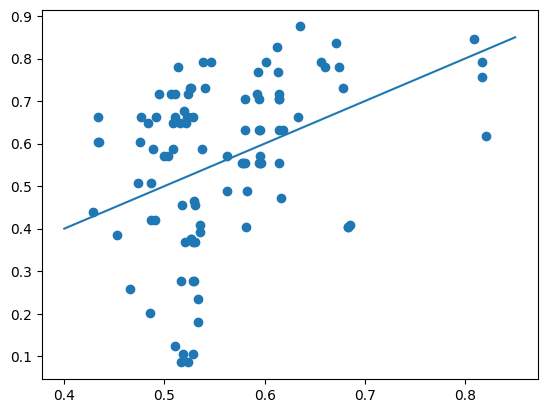

In [5]:
print(model.params)
line = np.linspace(0.4, 0.85)
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.plot(line, line)
# plt.xlim(0, 1)
# plt.ylim(0,1)

In [6]:
page_et = time.time()
print('Total runtime: ', int((page_et - page_st)/60), "m", int((page_et-page_st)%60), 's')

Total runtime:  1 m 25 s


[[[0.38512537 0.3607035  0.41489035]
  [0.38432685 0.62368559 0.43024636]]]

In [7]:
costs[-1]

0.03185761222134645